In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import zipfile

### 1. Read Data

Ecommerce dataset is a csv file and stored in zip. So, we have to unzip it before reading using pandas.

In [22]:
zf    = zipfile.ZipFile('../data/raw/ecommerce-data.zip')
order = pd.read_csv(zf.open('data.csv'), encoding ='ISO-8859-1', parse_dates= ["InvoiceDate"])
order.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


1. InvoiceNo: Invoice number. If this code starts with letter 'c', it indicates a cancellation.
2. StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 
3. Description: Product (item) name. Nominal. 
4. Quantity: The quantities of each product (item) per transaction. Numeric. 
5. InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated. 
6. UnitPrice: Unit price. Numeric, Product price per unit in sterling. 
7. CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 
8. Country: Country name. Nominal, the name of the country where each customer resides.

In [23]:
order.shape

(541909, 8)

In [24]:
order.set_index(['InvoiceDate'], inplace=True)
order.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


In [25]:
order.index

DatetimeIndex(['2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:26:00',
               '2010-12-01 08:26:00', '2010-12-01 08:28:00',
               '2010-12-01 08:28:00', '2010-12-01 08:34:00',
               ...
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00',
               '2011-12-09 12:50:00', '2011-12-09 12:50:00'],
              dtype='datetime64[ns]', name='InvoiceDate', length=541909, freq=None)

### 2. Handle Missing Data

In [26]:
order.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Assign "unknown" and -99999 to handle missing data in description and CostumerID column. 

In [27]:
order.fillna({})
order = order.fillna({
    'Description': 'unknown',
    'CustomerID' : -99999
})
order.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


In [28]:
order.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### 3. Check the Datatype

In [29]:
order.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 541909 entries, 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Data columns (total 7 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    541909 non-null object
Quantity       541909 non-null int64
UnitPrice      541909 non-null float64
CustomerID     541909 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [30]:
print("InvoiceNo    :", type(order.InvoiceNo[0]))
print("StockCode    :", type(order.StockCode[0]))
print("Description  :", type(order.Description[0]))
print("Quantity     :", type(order.Quantity[0]))
print("UnitPrice    :", type(order.UnitPrice[0]))
print("CustomerID   :", type(order.CustomerID[0]))
print("Country      :", type(order.Country[0]))

InvoiceNo    : <class 'str'>
StockCode    : <class 'str'>
Description  : <class 'str'>
Quantity     : <class 'numpy.int64'>
UnitPrice    : <class 'numpy.float64'>
CustomerID   : <class 'numpy.float64'>
Country      : <class 'str'>


Note : 
1. InvoiceNo's and StockCode's data type are a string because some of the data starts with a character 'c'. It means the costumer make a cancelation.
2. CostumerID's data type is a float, it should be an integer.

In [31]:
order.Quantity.astype("int")
print("Quantity     :", type(order.Quantity[0]))

Quantity     : <class 'numpy.int64'>


### 4. Get Real Order Dataframe

#### 4.1 Handle Wrong Format

Let's check wrong format in each column.

In [32]:
df = order[order['Quantity']<=0]
print(df.shape)
df.head()

(10624, 7)


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 09:41:00,C536379,D,Discount,-1,27.50,14527.0,United Kingdom
2010-12-01 09:49:00,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,15311.0,United Kingdom
2010-12-01 10:24:00,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,17548.0,United Kingdom
2010-12-01 10:24:00,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom
2010-12-01 10:24:00,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,17548.0,United Kingdom


In [33]:
df.Description.unique()

array(['Discount', 'SET OF 3 COLOURED  FLYING DUCKS',
       'PLASTERS IN TIN CIRCUS PARADE ', ...,
       'SMALL SQUARE CUT GLASS CANDLESTICK',
       'HOUSE SHAPE PENCIL SHARPENER', 'PAPER CRAFT , LITTLE BIRDIE'],
      dtype=object)

In [34]:
df = order[order['StockCode']=='D']
print(df.shape)
df.head()

(77, 7)


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 09:41:00,C536379,D,Discount,-1,27.50,14527.0,United Kingdom
2010-12-05 13:21:00,C537164,D,Discount,-1,29.29,14527.0,United Kingdom
2010-12-07 12:34:00,C537597,D,Discount,-1,281.00,15498.0,United Kingdom
2010-12-08 16:00:00,C537857,D,Discount,-1,267.12,17340.0,United Kingdom
2010-12-15 09:14:00,C538897,D,Discount,-1,5.76,16422.0,United Kingdom


In [35]:
df = order[order['UnitPrice']<0]
print(df.shape)
df

(2, 7)


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2011-08-12 14:51:00,A563186,B,Adjust bad debt,1,-11062.06,-99999.0,United Kingdom
2011-08-12 14:52:00,A563187,B,Adjust bad debt,1,-11062.06,-99999.0,United Kingdom


We don't need Discount and "Adjust Bad Debt" data, so we'll delete this data on the order data frame.

In [36]:
df = order[order['UnitPrice']==0]
df = df[df['Quantity']>0]
print(df.shape)
df

(1179, 7)


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 11:52:00,536414,22139,unknown,56,0.0,-99999.0,United Kingdom
2010-12-01 14:32:00,536545,21134,unknown,1,0.0,-99999.0,United Kingdom
2010-12-01 14:33:00,536546,22145,unknown,1,0.0,-99999.0,United Kingdom
2010-12-01 14:33:00,536547,37509,unknown,1,0.0,-99999.0,United Kingdom
2010-12-01 14:34:00,536549,85226A,unknown,1,0.0,-99999.0,United Kingdom
2010-12-01 14:34:00,536550,85044,unknown,1,0.0,-99999.0,United Kingdom
2010-12-01 14:34:00,536552,20950,unknown,1,0.0,-99999.0,United Kingdom
2010-12-01 14:35:00,536553,37461,unknown,3,0.0,-99999.0,United Kingdom
2010-12-01 14:35:00,536554,84670,unknown,23,0.0,-99999.0,United Kingdom


It is possible to get the price equals to zero. So we keep the data. 

In [37]:
# Selected data only with quantity and unitPrice > or >= zero
real_order = order[order['Quantity']  > 0]
real_order = real_order[real_order['UnitPrice'] >= 0]
real_order.shape

(531283, 7)

#### 4.2 Check Duplicate Data

In [38]:
duplicate_order = real_order[real_order.duplicated()]
duplicate_order

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 11:45:00,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,1.25,17908.0,United Kingdom
2010-12-01 11:45:00,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2.10,17908.0,United Kingdom
2010-12-01 11:45:00,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2.95,17908.0,United Kingdom
2010-12-01 11:45:00,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,4.95,17908.0,United Kingdom
2010-12-01 11:49:00,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2.95,17920.0,United Kingdom
2010-12-01 11:49:00,536412,22273,FELTCRAFT DOLL MOLLY,1,2.95,17920.0,United Kingdom
2010-12-01 11:49:00,536412,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,1,3.75,17920.0,United Kingdom
2010-12-01 11:49:00,536412,22141,CHRISTMAS CRAFT TREE TOP ANGEL,1,2.10,17920.0,United Kingdom
2010-12-01 11:49:00,536412,21448,12 DAISY PEGS IN WOOD BOX,1,1.65,17920.0,United Kingdom


There is no duplicate data in the dataframe. 

### 5 Real Order Description

In [39]:
real_order.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


In [40]:
real_order.shape

(531283, 7)

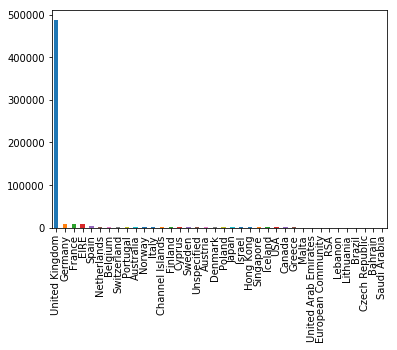

In [41]:
%matplotlib inline
real_order.Country.value_counts().plot.bar()

In [ ]:
InvoiceDate = real_order.groupby(['InvoiceNo']).resample("M")
InvoiceDate.plot()
# InvoiceDate.value_counts().sort_index().plot.bar()

#### 5.2 Cancel Order

In [ ]:
cancel_order['InvoiceNo'] = order['InvoiceNo'].apply(lambda x: -9999 if ('C' in x) else x)
cancel_order[cancel_order==-9999]

In [ ]:
cancel_order = order[order['Quantity']<0]
cancel_order.head()

In [ ]:
cancel_order.shape

In [ ]:
num_cancel = cancel_order.shape[0]
print('cancelation persentage %f%%' %(num_cancel/order.shape[0]*100))